<a href="https://colab.research.google.com/github/elhamsh93/action_recognition/blob/main/ResNet3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101.rar --no-check-certificate

--2023-05-07 10:23:06--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘UCF101.rar’

UCF101.rar          100%[===================>]   6.46G  42.1MB/s    in 2m 38s  

2023-05-07 10:25:45 (41.9 MB/s) - ‘UCF101.rar’ saved [6932971618/6932971618]



In [ ]:
!unrar x -r UCF101.rar

Streaming output truncated to the last 5000 lines.
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c05.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c06.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c07.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c01.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c02.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c03.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c04.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c05.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c06.avi             62%  OK 
Extracting  UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c07.avi             62%  OK 
Extracting  UCF-101/PlayingGu

In [ ]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip --no-check-certificate

--2023-05-04 07:51:11--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘UCF101TrainTestSplits-RecognitionTask.zip’

UCF101TrainTestSpli 100%[===================>] 111.27K  --.-KB/s    in 0.07s   

2023-05-04 07:51:12 (1.51 MB/s) - ‘UCF101TrainTestSplits-RecognitionTask.zip’ saved [113943/113943]



In [ ]:
!unzip UCF101TrainTestSplits-RecognitionTask.zip

Archive:  UCF101TrainTestSplits-RecognitionTask.zip
   creating: ucfTrainTestlist/
  inflating: ucfTrainTestlist/classInd.txt  
  inflating: ucfTrainTestlist/testlist01.txt  
  inflating: ucfTrainTestlist/testlist02.txt  
  inflating: ucfTrainTestlist/testlist03.txt  
  inflating: ucfTrainTestlist/trainlist01.txt  
  inflating: ucfTrainTestlist/trainlist02.txt  
  inflating: ucfTrainTestlist/trainlist03.txt  


In [ ]:
import torchvision
from torchvision.datasets.video_utils import read_video

In [ ]:
!pip install av

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 49.3 MB/s eta 0:00:00


In [ ]:
import av
print (av.__version__)

10.0.0


In [ ]:
video = read_video('/content/UCF-101/BenchPress/v_BenchPress_g01_c01.avi')

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [ ]:
from google.colab.patches import cv2_imshow

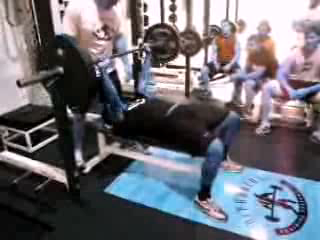

In [ ]:
cv2_imshow(video[0][0].numpy())

In [ ]:
import torch

In [ ]:
dataset = torchvision.datasets.DatasetFolder('/content/UCF-101', loader=read_video, extensions='avi')

In [ ]:
dataset.class_to_idx

{'ApplyEyeMakeup': 0,
 'ApplyLipstick': 1,
 'Archery': 2,
 'BabyCrawling': 3,
 'BalanceBeam': 4,
 'BandMarching': 5,
 'BaseballPitch': 6,
 'Basketball': 7,
 'BasketballDunk': 8,
 'BenchPress': 9,
 'Biking': 10,
 'Billiards': 11,
 'BlowDryHair': 12,
 'BlowingCandles': 13,
 'BodyWeightSquats': 14,
 'Bowling': 15,
 'BoxingPunchingBag': 16,
 'BoxingSpeedBag': 17,
 'BreastStroke': 18,
 'BrushingTeeth': 19,
 'CleanAndJerk': 20,
 'CliffDiving': 21,
 'CricketBowling': 22,
 'CricketShot': 23,
 'CuttingInKitchen': 24,
 'Diving': 25,
 'Drumming': 26,
 'Fencing': 27,
 'FieldHockeyPenalty': 28,
 'FloorGymnastics': 29,
 'FrisbeeCatch': 30,
 'FrontCrawl': 31,
 'GolfSwing': 32,
 'Haircut': 33,
 'HammerThrow': 34,
 'Hammering': 35,
 'HandstandPushups': 36,
 'HandstandWalking': 37,
 'HeadMassage': 38,
 'HighJump': 39,
 'HorseRace': 40,
 'HorseRiding': 41,
 'HulaHoop': 42,
 'IceDancing': 43,
 'JavelinThrow': 44,
 'JugglingBalls': 45,
 'JumpRope': 46,
 'JumpingJack': 47,
 'Kayaking': 48,
 'Knitting': 49,


In [ ]:
dataset.samples

[('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c06.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c04.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c02.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c03.avi', 0),
 ('/content/UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c04.avi', 0),
 ('/content/UCF-101/

In [ ]:
video_list = [x[0] for x in dataset.samples]

In [ ]:
from torchvision.datasets.video_utils import VideoClips

In [ ]:
video_clips = VideoClips(video_paths=video_list, clip_length_in_frames=15)

100%|██████████| 833/833 [06:52<00:00,  2.02it/s]


In [ ]:
video_clips.num_clips()

NameError: ignored

In [ ]:
video_clips.num_videos()


13320

In [ ]:
class UCF101Dataset(torch.utils.data.Dataset):
  def __init__(self,):
    self.dataset = torchvision.datasets.DatasetFolder('/content/UCF-101', loader=read_video, extensions='avi')
    self.video_list = [x[0] for x in self.dataset.samples]
    self.video_clips = VideoClips(video_paths=self.video_list, clip_length_in_frames=15)
    self.transform = None
  
  def __getitem__(self, idx):
    video, audio, info, video_idx =  self.video_clips.get_clip(idx)
    label = self.samples[video_idx][1]
    if self.transform is not None:
      pass
    return video, label

  def __len__(self,):
    return self.video_clips.num_clips()
  

In [ ]:
ucf101 = UCF101Dataset()

100%|██████████| 833/833 [06:40<00:00,  2.08it/s]


# UCF101 Dataset

In [ ]:
ucf_dataset = torchvision.datasets.UCF101(root='/content/UCF-101',
                                          
                                          annotation_path='/content/ucfTrainTestlist',
                                          frames_per_clip=15)

100%|██████████| 833/833 [06:51<00:00,  2.02it/s]


In [ ]:
from torch.utils.data.dataloader import default_collate

In [ ]:
from torchvision.datasets.samplers import DistributedSampler, RandomClipSampler, UniformClipSampler


In [ ]:
def collate_fn(batch):
    # remove audio from the batch
    batch = [(d[0], d[2], d[3])  for d in batch if len(d) >= 4]
    return default_collate(batch)

In [ ]:
train_sampler = RandomClipSampler(ucf_dataset.video_clips, 5)


In [ ]:
data_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=1,
        sampler=train_sampler,
        num_workers=2,
        pin_memory=True,
        collate_fn=collate_fn,
    )

In [ ]:
(ucf_dataset[0][0].shape)

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([15, 240, 320, 3])

# Pretrained Models

In [ ]:
model = torchvision.models.video.r2plus1d_18(True)

NameError: ignored

In [ ]:
model

VideoResNet(
  (stem): R2Plus1dStem(
    (0): Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
    (1): BatchNorm3d(45, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2Plus1D(
          (0): Conv3d(64, 144, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
          (1): BatchNorm3d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(144, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
        )
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [ ]:
model(torch.rand(2, 3, 25, 112, 112)).shape

torch.Size([2, 400])

In [ ]:
model.fc = torch.nn.Linear(512, 101)
model

VideoResNet(
  (stem): R2Plus1dStem(
    (0): Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
    (1): BatchNorm3d(45, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2Plus1D(
          (0): Conv3d(64, 144, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
          (1): BatchNorm3d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(144, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
        )
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [ ]:
!git clone https://github.com/pytorch/vision.git

Cloning into 'vision'...
remote: Enumerating objects: 323000, done.
remote: Counting objects: 100% (971/971), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 323000 (delta 756), reused 924 (delta 730), pack-reused 322029
Receiving objects: 100% (323000/323000), 654.75 MiB | 35.40 MiB/s, done.
Resolving deltas: 100% (296802/296802), done.


In [ ]:
%%shell

cp /content/vision/references/video_classification/datasets.py ./
cp /content/vision/references/video_classification/presets.py ./
cp /content/vision/references/video_classification/train.py ./
cp /content/vision/references/video_classification/transforms.py ./
cp /content/vision/references/video_classification/utils.py ./

In [ ]:
!ls

datasets.py  train.py	    UCF101TrainTestSplits-RecognitionTask.zip
presets.py   transforms.py  ucfTrainTestlist
__pycache__  UCF-101	    utils.py
sample_data  UCF101.rar     vision


In [ ]:
!cd content/

In [ ]:
!ls

In [ ]:
!python train.py --data-path='/content/UCF-101' --batch-size=8 


pppppppppppppppppppppppppppppppppppp
Not using distributed mode
Namespace(data_path='/content/UCF-101', kinetics_version='400', model='r2plus1d_18', device='cuda', clip_len=16, frame_rate=15, clips_per_video=5, batch_size=8, epochs=45, workers=10, lr=0.64, momentum=0.9, weight_decay=0.0001, lr_milestones=[20, 30, 40], lr_gamma=0.1, lr_warmup_epochs=10, lr_warmup_method='linear', lr_warmup_decay=0.001, print_freq=10, output_dir='.', resume='', start_epoch=0, cache_dataset=False, sync_bn=False, test_only=False, use_deterministic_algorithms=False, world_size=1, dist_url='env://', val_resize_size=(128, 171), val_crop_size=(112, 112), train_resize_size=(128, 171), train_crop_size=(112, 112), weights=None, amp=False, distributed=False)
Loading data
Loading training data
100% 833/833 [06:45<00:00,  2.06it/s]
Took 405.59648060798645
Loading validation data
100% 833/833 [06:43<00:00,  2.07it/s]
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: Use

In [ ]:
!ls

datasets.py  train.py	    UCF101TrainTestSplits-RecognitionTask.zip
presets.py   transforms.py  ucfTrainTestlist
__pycache__  UCF-101	    utils.py
sample_data  UCF101.rar     vision
